<a href="https://colab.research.google.com/github/kmonroyzm/kmonroyzm/blob/main/HW3_Harvard_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Python for Research Homework: Week 3, Case Study 3

In this case study, we will analyze a dataset consisting of an assortment of wines classified as "high quality" and "low quality" and will use k-Nearest Neighbors classification to determine whether or not other information about the wine helps us correctly guess whether a new wine will be of high quality.

In [ ]:

import numpy as np, random, scipy.stats as ss

def majority_vote_fast(votes):
    mode, count = ss.mstats.mode(votes)
    return mode

def distance(p1, p2):
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

def find_nearest_neighbors(p, points, k=5):
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote_fast(outcomes[ind])[0]

### Exercise 1

Our first step is to import the dataset.

#### Instructions
- Read in the data as a pandas dataframe using `pd.read_csv`. The data can be found at https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@wine.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Ruta del archivo CSV en Google Drive
file_path = '/content/drive/MyDrive/Harvard/wine.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras 5 filas del DataFrame para inspección
print(df.head())

# Contar cuántos vinos de alta calidad hay en las primeras 5 filas

high_quality_count = df.head()['high_quality'].sum()
print(f"Número de vinos de alta calidad en las primeras 5 filas: {high_quality_count}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unnamed: 0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0           0            7.4              0.70         0.00             1.9   
1           1            7.8              0.88         0.00             2.6   
2           2            7.8              0.76         0.04             2.3   
3           3           11.2              0.28         0.56             1.9   
4           4            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076              

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Exercise 2

Next, we will inspect the dataset and perform some mild data cleaning.

#### Instructions
- In order to get all numeric data, we will change the `color` column to an `is_red` column.
    - If `color == 'red'`, we will encode a `1` for `is_red`
    - If `color == 'white'`, we will encode a `0` for `is_red`
- Create this new column, `is_red`.
- Drop the `color`, `quality`, and `high_quality` columns as we will be predict the quality of wine using numeric data in a later exercise
- Store this all numeric data in a pandas dataframe called `numeric_data`

In [ ]:
# write your code here!
import pandas as pd

# Ruta del archivo CSV en Google Drive
file_path = '/content/drive/MyDrive/Harvard/wine.csv'

# Cargar el archivo CSV en un DataFrame de Pandas
df = pd.read_csv(file_path)

# Crear la columna is_red basada en la columna color
df['is_red'] = df['color'].apply(lambda x: 1 if x == 'red' else 0)

# Eliminar las columnas color, quality y high_quality
columns_to_drop = ['color', 'quality', 'high_quality']
df = df.drop(columns=columns_to_drop)

# Almacenar los datos numéricos en un nuevo DataFrame
numeric_data = df.copy()

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(numeric_data.head())

# Contar el número de vinos tintos en el dataset
num_red_wines = df['is_red'].sum()

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(numeric_data.head())

# Ruta del archivo CSV en Google Drive
file_path = '/content/drive/MyDrive/Harvard/wine.csv'

# Cargar el archivo CSV en un DataFrame de Pandas
df = pd.read_csv(file_path)

# Crear la columna is_red basada en la columna color
df['is_red'] = df['color'].apply(lambda x: 1 if x == 'red' else 0)

# Eliminar las columnas color, quality y high_quality
columns_to_drop = ['color', 'quality', 'high_quality']
df = df.drop(columns=columns_to_drop)

# Almacenar los datos numéricos en un nuevo DataFrame
numeric_data = df.copy()

# Contar el número de vinos tintos en el dataset
num_red_wines = df['is_red'].sum()

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(numeric_data.head())

# Imprimir el número de vinos tintos en el dataset
print(f"Número de vinos tintos en el dataset: {num_red_wines}")

   Unnamed: 0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0           0            7.4              0.70         0.00             1.9   
1           1            7.8              0.88         0.00             2.6   
2           2            7.8              0.76         0.04             2.3   
3           3           11.2              0.28         0.56             1.9   
4           4            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  is_red  
0       0.56      9.4       1  
1       0.68    

### Exercise 3

We want to ensure that each variable contributes equally to the kNN classifier, so we will need to scale the data by subtracting the mean of each variable (column) and dividing each variable (column) by its standard deviation. Then, we will use principal components to take a linear snapshot of the data from several different angles, with each snapshot ordered by how well it aligns with variation in the data. In this exercise, we will scale the numeric data and extract the first two principal components.

#### Instructions
- Scale the data using the `sklearn.preprocessing` function `scale()` on `numeric_data`.
- Convert this to a `pandas` dataframe, and store as `numeric_data`.
    - Include the numeric variable names using the parameter `columns = numeric_data.columns`.
- Use the `sklearn.decomposition` module `PCA()` and store it as `pca`.
- Use the `fit_transform()` function to extract the first two principal components from the data, and store them as `principal_components`.
- *Note*: You may get a `DataConversionWarning`, but you can safely ignore it

In [ ]:
import sklearn.preprocessing
import sklearn.decomposition

# Escalar los datos utilizando StandardScaler
scaled_data = sklearn.preprocessing.scale(numeric_data)

# Convertir los datos escalados a un DataFrame de Pandas
numeric_data = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Aplicar PCA para extraer los primeros dos componentes principales
pca = sklearn.decomposition.PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Obtener la forma del nuevo conjunto de datos de componentes principales
shape_of_dataset = principal_components.shape

# Imprimir la forma del nuevo conjunto de datos
print(f"Forma del nuevo conjunto de datos de componentes principales: {shape_of_dataset}")


Forma del nuevo conjunto de datos de componentes principales: (6497, 2)


### Exercise 4

In this exercise, we will plot the first two principal components of the covariates in the dataset. The high and low quality wines will be colored using red and blue, respectively.

#### Instructions
- The first two principal components can be accessed using `principal_components[:,0]` and `principal_components[:,1]`. Store these as `x` and `y` respectively, and make a scatter plot of these first two principal components.
- How well are the two groups of wines separated by the first two principal components?

Index(['Unnamed: 0', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'is_red'],
      dtype='object')


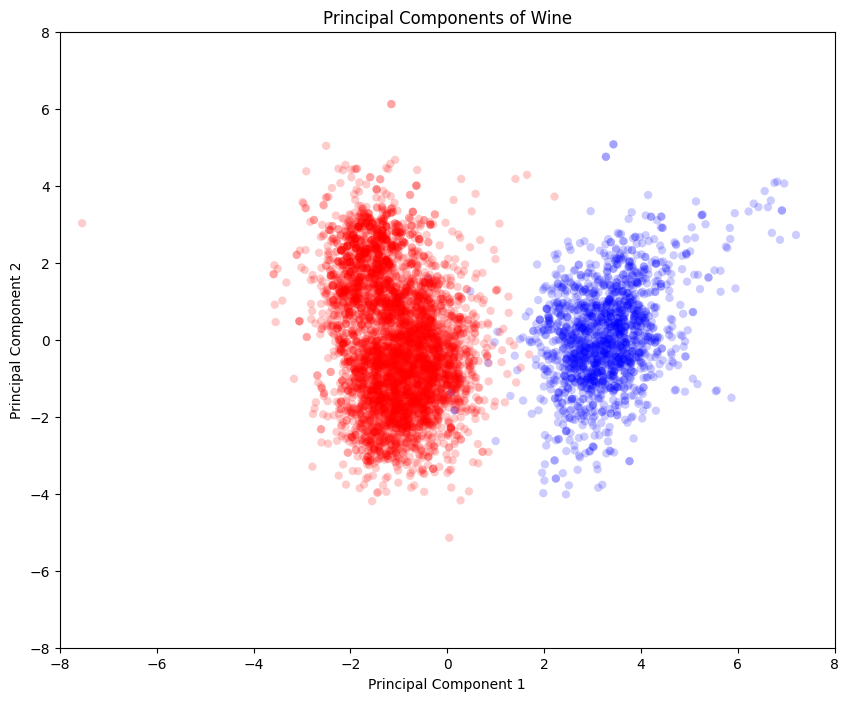

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Verificar si la columna 'high_quality' está presente en numeric_data
print(numeric_data.columns)

# De acuerdo con el ejercicio anterior, numeric_data debería incluir 'is_red' en lugar de 'high_quality'

# Crear colormap para visualización
observation_colormap = ListedColormap(['red', 'blue'])
x = principal_components[:, 0]
y = principal_components[:, 1]

plt.figure(figsize=(10, 8))
plt.title("Principal Components of Wine")
plt.scatter(x, y, alpha=0.2,
            c=numeric_data['is_red'], cmap=observation_colormap, edgecolors='none')
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### Exercise 5

In this exercise, we will create a function that calculates the accuracy between predictions and outcomes.

#### Instructions
- Create a function `accuracy(predictions, outcomes)` that takes two lists of the same size as arguments and returns a single number, which is the percentage of elements that are equal for the two lists.
- Use accuracy to compare the percentage of similar elements in the `x` and `y` `numpy` arrays defined below.
- Print your answer.

In [ ]:
import numpy as np

# Setting random seed for reproducibility
np.random.seed(1)

# Generate random arrays x and y of size 1000 with values 0 or 1
x = np.random.randint(0, 2, 1000)
y = np.random.randint(0, 2, 1000)

def accuracy(predictions, outcomes):
    # Ensure both predictions and outcomes are numpy arrays for easy comparison
    predictions = np.array(predictions)
    outcomes = np.array(outcomes)

    # Calculate accuracy as percentage of correct predictions
    return np.mean(predictions == outcomes) * 100

# Calculate accuracy of x predictions on true outcomes y
accuracy_result = accuracy(x, y)

# Print the accuracy result
print(f"Accuracy of x predictions on true outcomes y: {accuracy_result:.2f}%")


Accuracy of x predictions on true outcomes y: 51.50%


### Exercise 6

The dataset remains stored as data. Because most wines in the dataset are classified as low quality, one very simple classification rule is to predict that all wines are of low quality. In this exercise, we determine the accuracy of this simple rule.

#### Instructions
- Use `accuracy()` to calculate how many wines in the dataset are of low quality. Do this by using 0 as the first argument, and `data["high_quality"]` as the second argument.
- Print your result.

In [ ]:
import pandas as pd

# Suponiendo que el archivo CSV está en la ruta '/ruta/al/archivo/wine_dataset.csv'
file_path = '/content/drive/MyDrive/Harvard/wine.csv'
# Cargar el archivo CSV en un DataFrame de Pandas
data = pd.read_csv(file_path)
# Utilizar la función accuracy para calcular la precisión de la regla simple
accuracy_result = accuracy(np.zeros(len(data["high_quality"])), data["high_quality"])

# Imprimir el resultado de la precisión
print(f"Accuracy of predicting all wines as low quality: {accuracy_result:.2f}%")

Accuracy of predicting all wines as low quality: 36.69%


### Exercise 7

In this exercise, we will use the kNN classifier from `scikit-learn` to predict the quality of wines in our dataset.

#### Instructions
- Use `knn.predict(numeric_data)` to predict which wines are high and low quality and store the result as `library_predictions`.
- Use `accuracy` to find the accuracy of your predictions, using `library_predictions` as the first argument and `data["high_quality"]` as the second argument.
- Print your answer. Is this prediction better than the simple classifier in Exercise 6?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializar el clasificador kNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el clasificador kNN
knn.fit(numeric_data, data['high_quality'])

# Hacer predicciones utilizando el conjunto de datos numeric_data
library_predictions = knn.predict(numeric_data)

# Calcular la precisión de las predicciones
accuracy_result = accuracy(library_predictions, data["high_quality"])

# Imprimir el resultado de la precisión redondeado al entero más cercano
print(f"Accuracy of the KNN classifier: {round(accuracy_result)}%")

Accuracy of the KNN classifier: 84%


### Exercise 8

Unlike the `scikit-learn` function, our homemade kNN classifier does not take any shortcuts in calculating which neighbors are closest to each observation, so it is likely too slow to carry out on the whole dataset. In this exercise, we will select a subset of our data to use in our homemade kNN classifier.

#### Instructions
- Fix the random generator using `random.seed(123)`, and select 10 rows from the dataset using `random.sample(range(n_rows), 10)`. Store this selection as `selection`.

In [ ]:
import random

# Fijar la semilla del generador aleatorio para reproducibilidad
random.seed(123)

# Obtener el número total de filas en el conjunto de datos
n_rows = data.shape[0]

# Seleccionar aleatoriamente 10 índices de fila
selection = random.sample(range(n_rows), 10)

# Obtener el índice de la 10ma fila seleccionada (restar 1 porque la lista es indexada desde 0)
tenth_random_row = selection[9]  # El índice 9 corresponde a la décima fila seleccionada

# Imprimir el número de la fila seleccionada (1-based index)
print(tenth_random_row + 1)

4393
